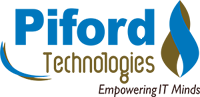

# Multinomial Naive Bayes

In [1]:
import numpy as np
#from sklearn.naive_bayes import MultinomialNB

import pandas as pd

df = pd.read_csv('sample_news.csv')
df.head()



,Title,Category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Fed Char...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [2]:
df.shape

(77, 2)

In [3]:
df['Category'].value_counts() # b- business, t- technology, e-entertainment

b    31
e    24
t    22
Name: Category, dtype: int64

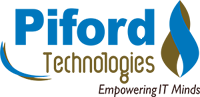

# Basics of NLP

In [4]:
import nltk
#nltk.download()
from nltk import word_tokenize
 
data = "Piford Technologies is a Software Development company. Piford also provide trainings."
print(word_tokenize(data))

['Piford', 'Technologies', 'is', 'a', 'Software', 'Development', 'company', '.', 'Piford', 'also', 'provide', 'trainings', '.']


In [5]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))
print(stopWords)


{'not', 'have', 'when', 'them', 'with', 'didn', "haven't", 'against', 'or', 'me', 'which', 'those', 'wouldn', 'down', 'too', 'during', 've', 'do', 're', 'is', "that'll", 'won', 't', 'here', 'only', 'himself', 'its', 'below', 'ain', 'mightn', 'i', 'had', "mightn't", 'm', 'most', 'just', 'such', 'you', 'up', 'doesn', "shan't", 'herself', 'shan', 'all', 'again', 'now', 'y', "you're", 'this', "she's", 'own', 'on', 'under', 'ourselves', 'weren', 'how', 'does', 'if', 'why', 'where', 'we', 'each', 'into', "wouldn't", 'an', 'd', 'her', 'over', 'isn', 'out', 'couldn', 'ours', "you'd", 'myself', 'wasn', 'being', 'at', 'above', 'needn', 'about', 'both', "hasn't", 'yourself', 'theirs', 'what', 'no', 'these', 'so', "isn't", "wasn't", 'very', 'of', 'as', 'once', 'than', 'other', "don't", 'further', 'hers', 'after', 'there', 'through', 'themselves', 'she', 'was', 'll', 'yours', "didn't", "won't", 'any', 'the', 'it', 'itself', "should've", 'for', "needn't", "shouldn't", 'hadn', 'until', 'will', 'hasn'

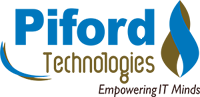

In [6]:
import string
data = "Piford's Technologies, Piford is in Mohali !."
data_1=[char for char in data if char not in string.punctuation]
print(data_1)


['P', 'i', 'f', 'o', 'r', 'd', 's', ' ', 'T', 'e', 'c', 'h', 'n', 'o', 'l', 'o', 'g', 'i', 'e', 's', ' ', 'P', 'i', 'f', 'o', 'r', 'd', ' ', 'i', 's', ' ', 'i', 'n', ' ', 'M', 'o', 'h', 'a', 'l', 'i', ' ']


In [7]:
data_1=''.join(data_1)
print(data_1)

Pifords Technologies Piford is in Mohali 


In [8]:
data_1=data_1.split()  #word_tokenize(data)
print(data_1)

['Pifords', 'Technologies', 'Piford', 'is', 'in', 'Mohali']


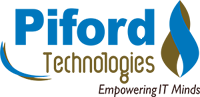

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
data_1 = ["Piford Technologies Piford is in Mohali."]

# create the transform
vectorizer = CountVectorizer()

vectorizer.fit(data_1)


print(vectorizer.vocabulary_)  

{'piford': 3, 'technologies': 4, 'is': 1, 'in': 0, 'mohali': 2}


In [10]:
"""encode document"""
vector = vectorizer.transform(data_1)
print(vector)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (0, 4)	1


In [11]:
def text_cleaning(a):
 remove_punctuation = [char for char in a if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation)   
 return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]


In [12]:
df.head()

,Title,Category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Fed Char...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [13]:
print(df.iloc[:,0].apply(text_cleaning))#data after removing punctuation and stop words


0     [Fed, official, says, weak, data, caused, weat...
1     [Feds, Charles, Plosser, sees, high, bar, chan...
2     [US, open, Stocks, fall, Fed, official, hints,...
3     [Fed, risks, falling, behind, curve, Fed, Char...
4     [Feds, Plosser, Nasty, Weather, Curbed, Job, G...
                            ...                        
72                           [Final, 2013, Q4, GDP, 26]
73            [US, fourthquarter, growth, higher, 26pc]
74    [US, economic, growth, better, thought, fourth...
75    [US, fourthquarter, growth, raised, jobless, c...
76        [US, economic, growth, 4Q, revised, slightly]
Name: Title, Length: 77, dtype: object


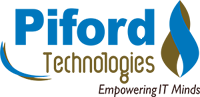

In [14]:

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(df['Title']) 
  
#print(len(bow_transformer.vocabulary_))   
bow_transformer.vocabulary_

{'Fed': 43,
 'official': 213,
 'says': 230,
 'weak': 253,
 'data': 178,
 'caused': 170,
 'weather': 254,
 'slow': 237,
 'taper': 244,
 'Feds': 44,
 'Charles': 27,
 'Plosser': 100,
 'sees': 231,
 'high': 194,
 'bar': 164,
 'change': 171,
 'pace': 215,
 'tapering': 245,
 'US': 145,
 'open': 214,
 'Stocks': 131,
 'fall': 184,
 'hints': 196,
 'accelerated': 158,
 'risks': 227,
 'falling': 185,
 'behind': 165,
 'curve': 177,
 'Nasty': 88,
 'Weather': 149,
 'Curbed': 30,
 'Job': 70,
 'Growth': 56,
 'May': 81,
 'Accelerate': 12,
 'Tapering': 135,
 'Pace': 96,
 'Taper': 134,
 'may': 210,
 'expects': 182,
 'unemployment': 248,
 '62': 10,
 'end': 181,
 '2014': 3,
 'jobs': 201,
 'growth': 191,
 'last': 203,
 'month': 211,
 'hit': 197,
 'weatherFed': 255,
 'President': 104,
 'ECB': 37,
 'unlikely': 249,
 'sterilisation': 240,
 'SMP': 118,
 'purchases': 220,
 'traders': 247,
 'George': 53,
 'Zimmerman': 156,
 'Armed': 17,
 'Life': 75,
 'Move': 86,
 'Signs': 125,
 'Autographs': 19,
 'Florida': 47,
 

In [15]:
title_bow = bow_transformer.transform(df['Title'])

print(title_bow)

  (0, 43)	1
  (0, 170)	1
  (0, 178)	1
  (0, 213)	1
  (0, 230)	1
  (0, 237)	1
  (0, 244)	1
  (0, 253)	1
  (0, 254)	1
  (1, 27)	1
  (1, 44)	1
  (1, 100)	1
  (1, 164)	1
  (1, 171)	1
  (1, 194)	1
  (1, 215)	1
  (1, 231)	1
  (1, 245)	1
  (2, 43)	1
  (2, 131)	1
  (2, 145)	1
  (2, 158)	1
  (2, 184)	1
  (2, 196)	1
  (2, 213)	1
  :	:
  (73, 191)	1
  (73, 195)	1
  (74, 2)	1
  (74, 145)	1
  (74, 166)	1
  (74, 179)	1
  (74, 186)	1
  (74, 191)	1
  (74, 222)	1
  (74, 246)	1
  (75, 9)	1
  (75, 145)	1
  (75, 173)	1
  (75, 187)	1
  (75, 191)	1
  (75, 200)	1
  (75, 208)	1
  (75, 212)	1
  (75, 223)	1
  (76, 7)	1
  (76, 145)	1
  (76, 179)	1
  (76, 191)	1
  (76, 226)	1
  (76, 236)	1


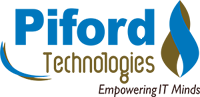

In [16]:
X = title_bow.toarray()
print(X)

 
X.shape  # 77,257  # 257 seperate words in our dataset and 77 rows

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(77, 257)

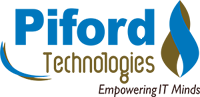

In [17]:

# TF-IDF Algo -term frequency-inverse document frequency to know the most significant words

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(title_bow)
print(tfidf_transformer)

title_tfidf=tfidf_transformer.transform(title_bow)
print(title_tfidf)# got tfidf values for whole vocabulary
print(title_tfidf.shape)   #(77, 257)


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
  (0, 254)	0.35272058888222585
  (0, 253)	0.35272058888222585
  (0, 244)	0.35272058888222585
  (0, 237)	0.322053921953571
  (0, 230)	0.30029557549957614
  (0, 213)	0.322053921953571
  (0, 178)	0.35272058888222585
  (0, 170)	0.35272058888222585
  (0, 43)	0.2834184908168553
  (1, 245)	0.33269962216828936
  (1, 231)	0.36437999556177075
  (1, 215)	0.33269962216828936
  (1, 194)	0.36437999556177075
  (1, 171)	0.36437999556177075
  (1, 164)	0.36437999556177075
  (1, 100)	0.2560640835009976
  (1, 44)	0.29278707192352826
  (1, 27)	0.31022203953138416
  (2, 245)	0.33475492468168067
  (2, 214)	0.36663100839979795
  (2, 213)	0.33475492468168067
  (2, 196)	0.36663100839979795
  (2, 184)	0.33475492468168067
  (2, 158)	0.36663100839979795
  (2, 145)	0.19838736221232084
  :	:
  (73, 145)	0.3048164290405196
  (73, 6)	0.5633179125409563
  (74, 246)	0.43227072692662877
  (74, 222)	0.3680221421874401
  (74, 191)	0.266190544651

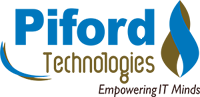

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(title_tfidf,df['Category'])


In [19]:
all_predictions = model.predict(title_tfidf)
print(all_predictions)

['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 't' 't'
 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't'
 't' 't' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b']


In [20]:
#Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix

confusion_matrix(df['Category'], all_predictions)

array([[31,  0,  0],
       [ 0, 24,  0],
       [ 0,  0, 22]], dtype=int64)